In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.datasets import make_classification

Загрузка датасета:

In [4]:
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['target'] = iris.target

Используя Matplotlib отрисуем в цвете для всех 3 сортов зависимости: 'sepal length - sepal
width’ и 'petal length - petal width'

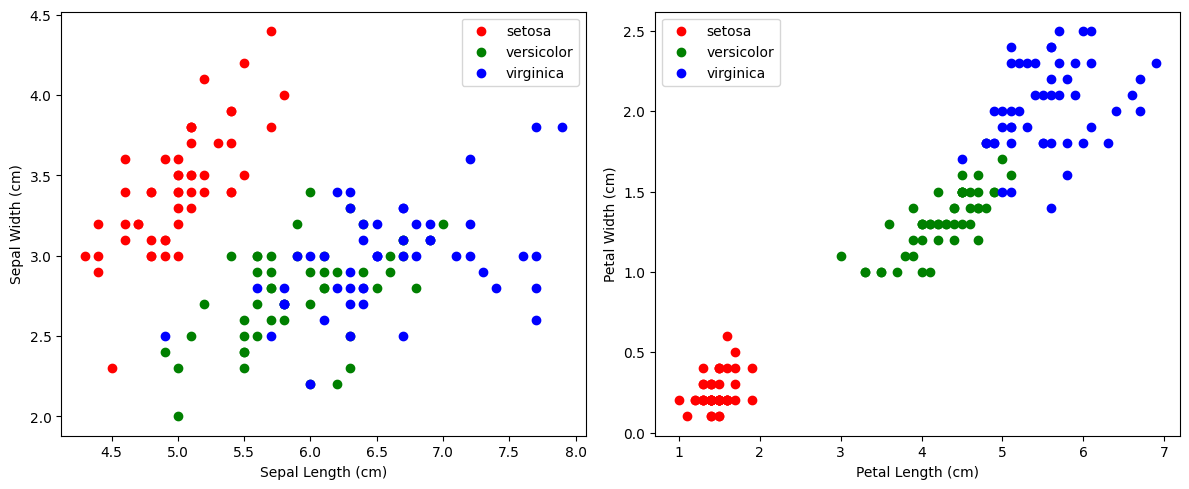

In [19]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
for target, color in zip([0, 1, 2], ['red', 'green', 'blue']):
    subset = df[df['target'] == target]
    plt.scatter(subset['sepal length (cm)'], subset['sepal width (cm)'], 
                c=color, label=iris.target_names[target])
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.legend()

plt.subplot(1, 2, 2)
for target, color in zip([0, 1, 2], ['red', 'green', 'blue']):
    subset = df[df['target'] == target]
    plt.scatter(subset['petal length (cm)'], subset['petal width (cm)'], 
                c=color, label=iris.target_names[target])
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.legend()

plt.tight_layout()
plt.show()

Используя библиотеку seaborn и метод pairplot выведем результат для всего датасета

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to 

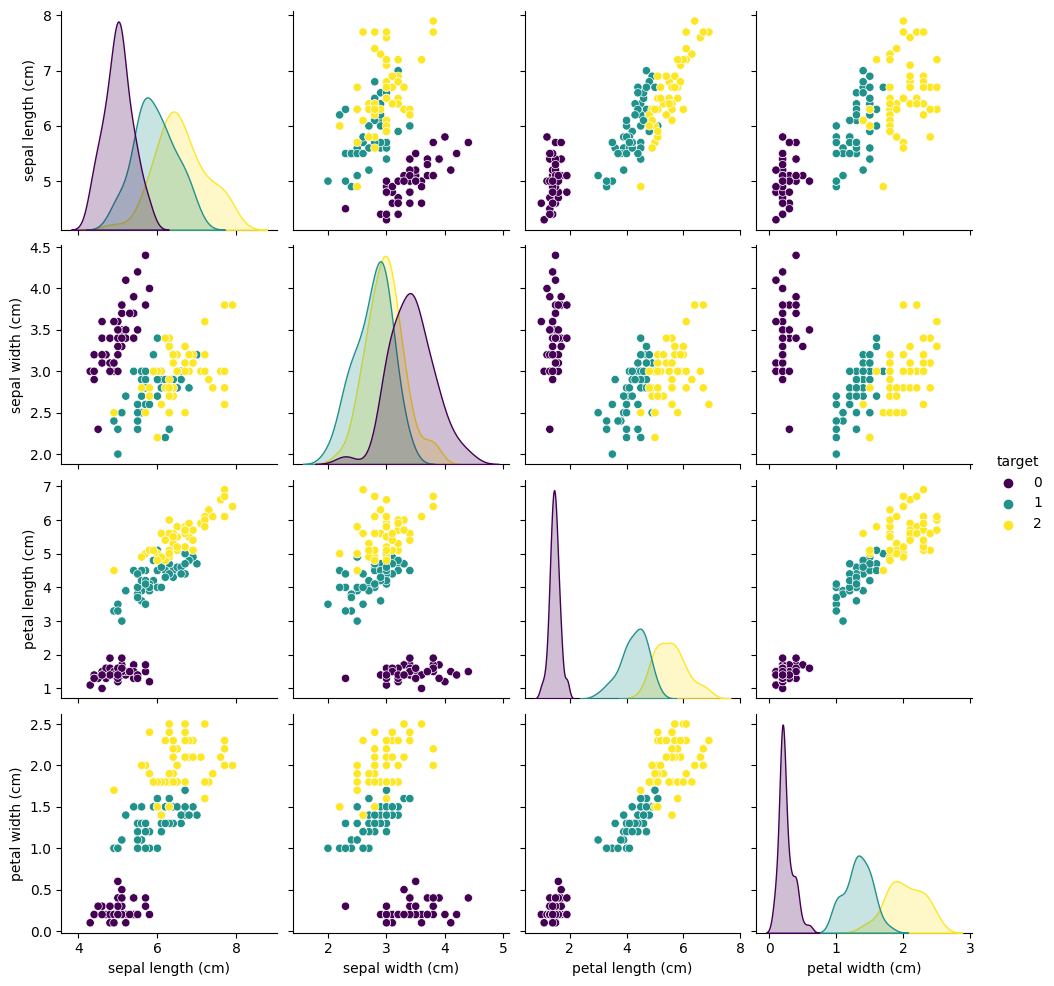

In [21]:
sns.pairplot(df, hue='target', palette='viridis')
plt.show()

Подготовим из имеющегося набора данных 2 датасета: в первом оставим setosa и versicolor, во втором – versicolor и virginica

In [28]:
df1 = df[df['target'].isin([0, 1])]
X1 = df1.drop('target', axis=1)
y1 = df1['target']
df2 = df[df['target'].isin([1, 2])]
X2 = df2.drop('target', axis=1)
y2 = df2['target']

Каждый датасет разобьем на обучающую и тестовые выборки

In [30]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.2, random_state=0)
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.2, random_state=42)

Обучим модель логистической регрессии, сделаем предсказания и выведем точность модели для датаесетов

In [33]:
def train_and_evaluate(X_train, X_test, y_train, y_test):

    clf = LogisticRegression(random_state=0)
    clf.fit(X_train, y_train)
    
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    return accuracy


accuracy1 = train_and_evaluate(X_train1, X_test1, y_train1, y_test1)
print(f'Точность для setosa - versicolor: {accuracy1:.2f}')

accuracy2 = train_and_evaluate(X_train2, X_test2, y_train2, y_test2)
print(f'Точность для versicolor - virginica: {accuracy2:.2f}')

Точность для setosa - versicolor: 1.00
Точность для versicolor - virginica: 0.95


Сгенерируем датасет случайным образом и проведем для него бинарную классификацию

In [34]:
X_synth, y_synth = make_classification(
    n_samples=1000, 
    n_features=2, 
    n_redundant=0,
    n_informative=2,
    random_state=1,
    n_clusters_per_class=1
)

Отрисуем полученный датасет используя Matplotlib

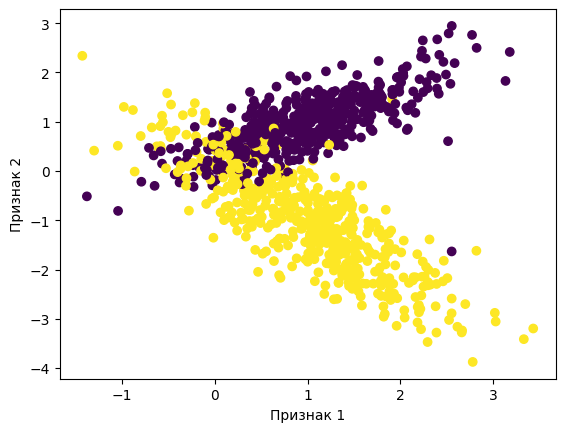

In [35]:
plt.scatter(X_synth[:, 0], X_synth[:, 1], c=y_synth, cmap='viridis')
plt.xlabel('Признак 1')
plt.ylabel('Признак 2')
plt.show()

Проведем бинарную классификацию

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X_synth, y_synth, test_size=0.2, random_state=42)

clf = LogisticRegression(random_state=0)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
accuracy_synth = accuracy_score(y_test, y_pred)
print(f'Точность для синтетических данных: {accuracy_synth:.2f}')

Точность для синтетических данных: 0.94
